
### Name: Murray Heymann


#### Student Number: 15988694

In [122]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from numpy.random import randint
from kmeans_resource import Kmeans as KM
from skimage import io
from ipywidgets import interact

### Perform $k$-means on an image

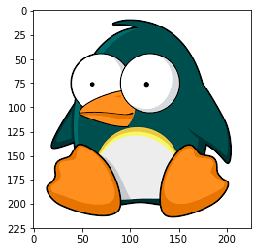

In [124]:
im = io.imread('./cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

### Clustering of colors

Note that the colors in the image above are clustered around only a few colors. **You need to find the clusters using the k-means algorithm in scikit-learn. Reproducing the image using only 3 colors gives something like the following image.** 

**How many clusters do you need for a perfect reproduction?**

*Note:* Before you produce the plot using plt.imshow(), make sure the image data is op type "unint8", i.e. set dtype = "uint8"

**Mark:** 1

One would expect 120 clusters to to produce a perfect representation, as that is the number of unique colours in the image


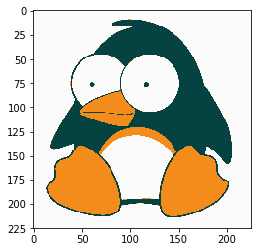

In [125]:
# Set up cluster data structure
kmeans = KMeans(n_clusters=3)

# flatten the image and transform
im_flat = np.reshape(im, (im.shape[0] * im.shape[1], -1))
im_flat_transformed = kmeans.fit(im_flat)


uniques = []
for i in im_flat:
    uniques.append(int(i[0]) + int(i[1])*256 + int(i[2])*256*256)
uniques = np.unique(np.array(uniques))
print ("One would expect", 
       uniques.shape[0], 
       "clusters to to produce a perfect representation, as", 
       "that is the number of unique colours in the image")

new_im = []
for i in kmeans.labels_:
    new_im.append(kmeans.cluster_centers_[i])

new_im = np.array(new_im, dtype="uint8")
new_im = np.reshape(new_im, im.shape)

plt.imshow(new_im)
plt.show()

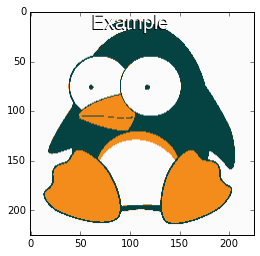

In [126]:
display(Image(filename='./wm_cartoon_repro.png'))

# Clustering of digits data

For the next problem you use k-means to cluster the digits data in the scikit-learn library. 

Although the digits data comes with labels, for your first task you ignore the labels and just see how well k-means clusters the different digits.

Before you get to that, though, this is too good an opportunity to investigate the  use of PCA and LDA on higher dimensional data!

### Load the digit datasets

The datasets are loaded into a dictionary.

In [127]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['DESCR', 'images', 'data', 'target', 'target_names'])


In [128]:
# Find the number of unique labels
number_digits = len(np.unique(digits.target))

print (number_digits)

10


# Inspect the different digit  images

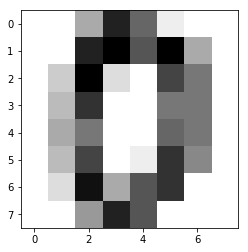

In [129]:

def show_digits(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(digits.images[k], cmap=cm.binary)   
    
    plt.show()
    
w_show_digits = interact(show_digits, k =(0, 1796)) 


# Project onto 2 PCA components

**Use the scikit-learn module and project the digits data onto 2 principal components. Display the clusters in different colors using the known labels.**

**Marks:** 1

In [136]:
# Create a regular PCA model 
# insert code

pca = PCA(n_components=2)

# Fit and transform the data to the model
# insert code
flat_digits = np.reshape(digits.images, (digits.images.shape[0], -1))
reduced_data_pca = pca.fit_transform(flat_digits) * -1


Using the code in the following code cell (it will not run as is because you need to calculate reduced_data_pca in the code cell above), to find the following

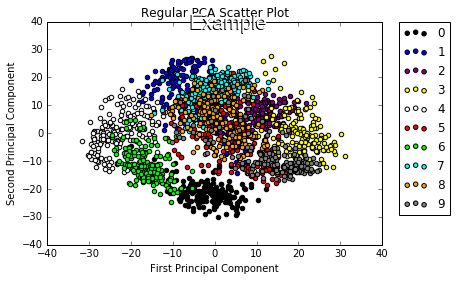

In [137]:
display(Image(filename='./wm_PCA.png'))

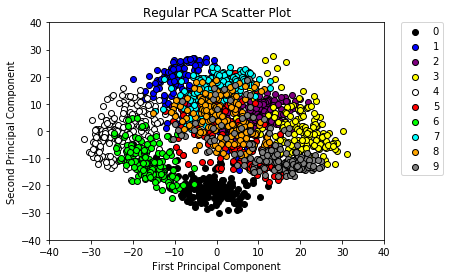

In [146]:
# This code will not execute because you have to provide data
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i], edgecolors="black")
        
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.axis([-40, 40, -40, 40])
plt.title("Regular PCA Scatter Plot")
plt.show()

# LDA

**Now do the same as for PCA but now project onto 2 LDA components to get the following:**

**Marks: 0**

In [150]:
lda = LDA(n_components=2)
reduced_data_lda = lda.fit_transform(flat_digits, digits.target)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


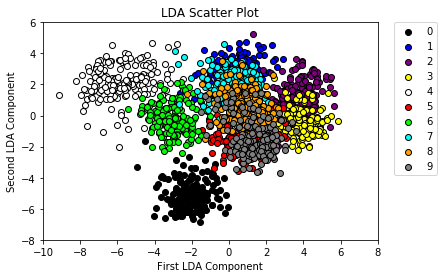

In [151]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_lda[:, 0][digits.target == i]
    y = reduced_data_lda[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i], edgecolors="black")
        
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.axis([-10, 8, -8, 6])
plt.title("LDA Scatter Plot")
plt.show()

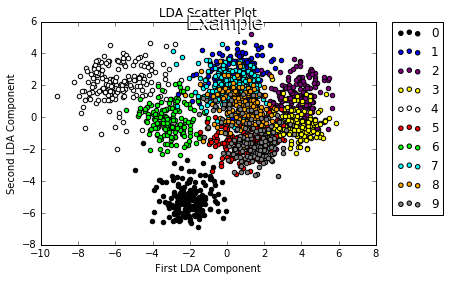

In [152]:
display(Image(filename='./wm_LDA.png'))

# Clustering the digits data

### Split the data into test and training sets

scikit-learn provides a convenient function to split given data into training, validation and test sets in its model_selection package.  Let's do that first.

In [13]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

In [14]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))
print (n_digits)

# Inspect `y_train`
print(len(y_train))

1347
64
10
1347


### K-means model

**Create the k-means model and display the means.**

**Marks:** 0

In [15]:
# Create the KMeans model
# insert the code. Make sure you set init='k-means++', and random_state=42


# Fit the training data to the model
# insert code

# Retrieve the cluster centres
# insert code

If you run the cell below you should find something like:

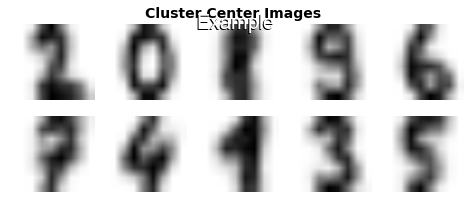

In [17]:
display(Image(filename='./wm_kmeans_digits.png'))

NameError: name 'cluster_centers' is not defined

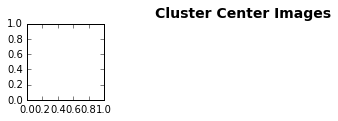

In [18]:
# This cell will not execute because you have to provide the data.

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(cluster_centers[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

# Confusion matrix

**Predict the labels using the k-means model you created above. Compare against the known labels using a confusion matrix.**

**Explain what you see, and comment on the accuracy of the predicted labels.** 

**Marks: 1**


In [29]:
# Predict the labels for `X_test`
# Insert code


# Print out the confusion matrix with `confusion_matrix()`
# insert code


# Really bad 

You should have observed serious problems with the confusion matrix above. **Next try to initialize the k-means algorithm by providing one random sample from each class as the initial mean estimate for each cluster.** Remember that the class labels are actually available in this case.

**Again plot the class means as above, predict the labels of the training data, and show the confusion matrix. Is there any improvement?**

**Marks: 1**

# Semi-supervised training

In assignment 2, you studied labeled data, and were introduced to the supervised learning process. So far, this assignment has considered how data can be organized if no labels are available, so-called unsupervised learning.

In practice it often happens that one has some labeled data available, in addition to (an often large amount of) unlabeled data. The question is how to make use of the additional information. This is known as semi-supervised learning.

You are now going to adapt the k-means algorithm for semi-supervised learning. For this you will use the kmeans.py package provided. The relevant code for semi-supervised learning was removed, but it still runs for unsupervised learning. The few code cells below execute it in unsupervised mode to give you an idea how it functions (not unlike the scikit-learn package).

In [20]:
# Random initialization 
km = KM(codes=10,itr=20)
km.fit(X_train)
cluster_centers = km.get_means

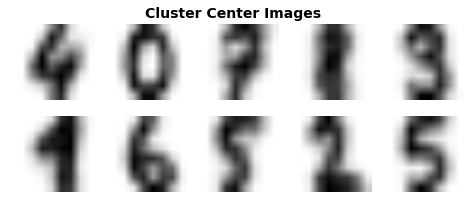

In [21]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(cluster_centers[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

# Creating Data

To use semi-supervised learning, we need some labeled data. To do this, we select an equal number of samples from each class, using the test set.

In [22]:
# The number of samples per class
n_samples = 2

# The same number of samples is generated for each class. This is just
# a convenience, any number will do. Note: Assume at least one sample for 
# each class
X_lbl = np.zeros((10*n_samples,64))
y_lbl = np.zeros((10*n_samples,))
for i in range(10):
    dat = X_test[y_test==i,:]
    samples = np.random.randint(0,dat.shape[0]-1,n_samples)

    X_lbl[i*n_samples:(i+1)*n_samples] = dat[samples]
    y_lbl[i*n_samples:(i+1)*n_samples] = i
    

Look at the data that we generated.

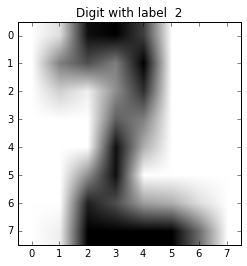

In [23]:
n,d = X_lbl.shape

def show_labeled_data(k=0):
    """
    Show the digits in the training set
    """
    
    plt.imshow(X_lbl[k].reshape(8,8), cmap=cm.binary)  
    plt.title('Digit with label  '+str(int(y_lbl[k])))
    
    plt.show()
    
w_show_labeled_data = interact(show_labeled_data, k =(0, n-1)) 

#### Modify code

**Modify the given k-means code to allow semi-supervised learning.** *Note*: You have to provide code anywhere you encounter the **pass** keyword; include *only* the code you added in your report, clearly indicating which portions correspond to the first, second, and third occurence of the **pass** keyword.

If your modification is successful, your cluster centres should look something like the image below. **Predict the labels in the training set and print the confusion matrix.**

**Marks:** 4

In [27]:
# This cell will not execute unless you have made the necessary modification.

km = KM(codes=10,itr=20)
km.fit(X_train,X_lbl,y_lbl)
km_cluster_centers = km.get_means

UnboundLocalError: local variable 'means' referenced before assignment

NameError: name 'km_cluster_centers' is not defined

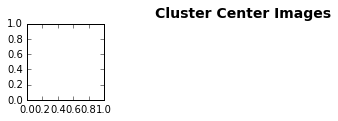

In [28]:
# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(km_cluster_centers[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

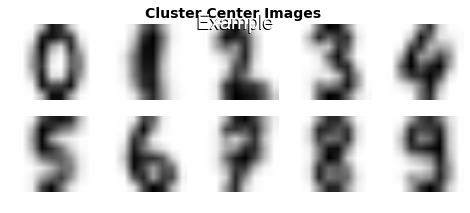

In [26]:
display(Image(filename='./wm_semi-supervised.png'))

# Confusion matrix

In this case we don't have the identifiability problem as indicated by the confusion matrix.

In [30]:
y_pred = km.predict(X_test)
print(confusion_matrix(y_test, y_pred))

AttributeError: 'Kmeans' object has no attribute 'means'

# GMM

**Next, fit the data to a 10 component GMM model, using the scikit-learn package.**

**Once you have built the GMM model, extract the means as well as the covariances of the 10 GMM components. Display the means to get something like the  image below.**

**Marks: 1**


In [31]:
data = digits.data

np.random.seed(1)
# Insert GMM code

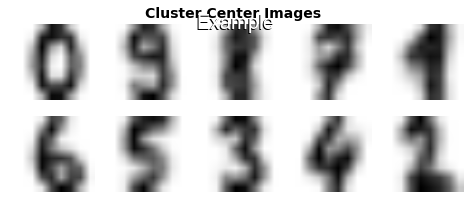

In [32]:
display(Image(filename='./wm_GMM.png'))

# Generate samples

**Use the means and covariances of the different components and draw a sample from each component. Display the samples in an image.**

*Hint*: Read the documentation of scipy.stats.multivariate_normal

**Marks:** 1

# Plagiarism declaration

** Add the plagiarism declaration from the University's Plagiarism Policy in this cell.**